In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [3]:
data = pd.read_csv('dc-wikia-data.csv', sep=",")

In [23]:
data.shape

(6896, 13)

In [24]:
data.isnull().sum()

In [25]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [26]:
data.dtypes

In [27]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 6896


In [28]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 355, 5.15%.
Колонка YEAR. Тип данных float64. Количество пустых значений 69, 1.0%.


In [29]:
data_num = data[num_cols]
data_num

,APPEARANCES,YEAR
0,3093.0,1939.0
1,2496.0,1986.0
2,1565.0,1959.0
3,1316.0,1987.0
4,1237.0,1940.0
...,...,...
6891,NaN,NaN
6892,NaN,NaN
6893,NaN,NaN
6894,NaN,NaN


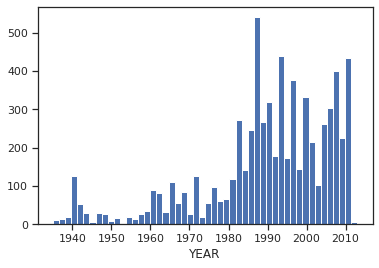

In [30]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [32]:
data_num_MasVnrArea = data_num[['YEAR']]
data_num_MasVnrArea.head()

,YEAR
0,1939.0
1,1986.0
2,1959.0
3,1987.0
4,1940.0


In [33]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

In [34]:
strategies=['median']

In [35]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [36]:
strategies[0], test_num_impute(strategies[0])

('median',
 array([1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992.,
        1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992.,
        1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992.,
        1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992.,
        1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992.,
        1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992.,
        1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992., 1992.,
        1992., 1992., 1992., 1992., 1992., 1992.]))

In [37]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 2013, 29.19%.
Колонка ALIGN. Тип данных object. Количество пустых значений 601, 8.72%.
Колонка EYE. Тип данных object. Количество пустых значений 3628, 52.61%.
Колонка HAIR. Тип данных object. Количество пустых значений 2274, 32.98%.
Колонка SEX. Тип данных object. Количество пустых значений 125, 1.81%.
Колонка GSM. Тип данных object. Количество пустых значений 6832, 99.07%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.04%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 69, 1.0%.


In [38]:
cat_temp_data = data[['ALIVE']]
cat_temp_data.head()

,ALIVE
0,Living Characters
1,Living Characters
2,Living Characters
3,Living Characters
4,Living Characters


In [39]:
cat_temp_data['ALIVE'].unique()

In [40]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

In [41]:
np.unique(data_imp2) #показываем отсутствие пустых значений

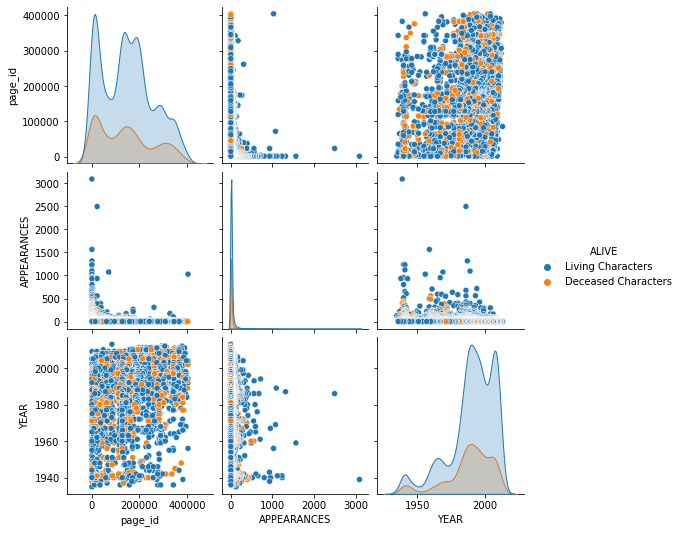

In [4]:
sns.pairplot(data, hue="ALIVE")